##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



In [214]:
#1
#import bibliotek
import pandas as pd
import numpy as np
#import scikit-learn
from matplotlib import pyplot as plt
from sklearn import linear_model  as lin
from sklearn.model_selection import train_test_split
#from patsy import dmatrices, dmatrix, demo_data

from sklearn import metrics
from sklearn.metrics import classification_report
#ścieżka danych
DATA = 'D:\Marcin\STUDIA\Automatyka i Robotyka\Semestr 5\Analiza i bazy danych\Lab. 7\laboratorium-lin-model-MarcinRyznar-main/'

### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


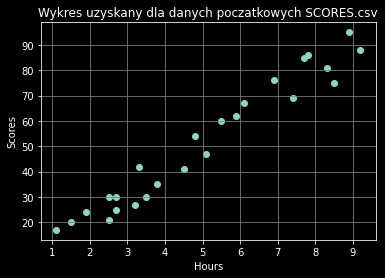

In [215]:
#2
# Wyświetlanie danych z pliku SCORES.csv
scores = pd.read_csv(f'{DATA}SCORES.csv', sep=',')
print(scores)

plt.scatter(scores['Hours'],scores['Scores'])
plt.title("Wykres uzyskany dla danych poczatkowych SCORES.csv")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.grid(color = 'grey')

In [216]:
scores_h = scores.head()
scores_h

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [217]:
scores_d = scores.describe()
scores_d

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [218]:
scores_s = scores.shape
scores_s

(25, 2)

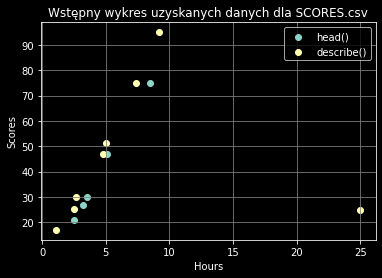

In [219]:
#3
#Tworzenie wykresu typu scatter
#Wykres na podstawie interpretacji danych wedlug metody head()
plt.scatter(scores_h['Hours'],scores_h['Scores'], label = 'head()')

#Wykres na podstawie interpretacji danych wedlug metody describe()
plt.scatter(scores_d['Hours'],scores_d['Scores'], label = 'describe()')
plt.title("Wstępny wykres uzyskanych danych dla SCORES.csv")
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.grid(color = 'grey')
plt.show()

Wyliczony wskaźnik dla modelu: coef_ 
 8.76882797853772 

Wyliczony wskaźnik dla modelu: intercept_ 
 4.199269506755453


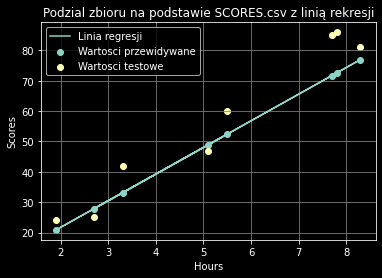

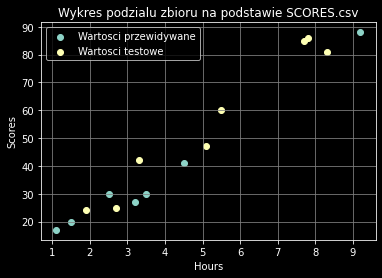

Średni błąd bezwzględny: (Mean Absolute Error) 6.884401868252633
Błąd średniokwadratowy: (Mean Squared Error) 66.23907569624802
Pierwiastek błędu średniokwadratowego : (Root Mean Squared Error) 8.138739195738369


In [220]:
#4
#funkcja reshape jest potrzebna do zastosowania lini regresji
h = scores['Hours'].to_numpy().reshape(-1, 1)
s = scores['Scores'].to_numpy().reshape(-1, 1)
#Podział podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) oraz podzial zbióru na dane testowe i treningowe (30%)
X_train, X_test, y_train, y_test = train_test_split(h, s, train_size=0.3, test_size=0.3)
# print("X_train \n", X_train)
# print("y_train \n", y_train)
# print("X_test \n", X_test)
# print("y_train \n", y_test)

#5
l_regresji = lin.LinearRegression()
l_regresji.fit(X_train, y_train)

#6
coef_ = l_regresji.coef_
intercept_ = l_regresji.intercept_
print("Wyliczony wskaźnik dla modelu: coef_ \n",coef_[0][0],'\n')
print("Wyliczony wskaźnik dla modelu: intercept_ \n",intercept_[0])

#7
y_pred = l_regresji.predict(X_test)

#8
plt.title("Podzial zbioru na podstawie SCORES.csv z linią rekresji")
plt.scatter(X_test, y_pred, label = 'Wartosci przewidywane')
plt.scatter(X_test,y_test,label = 'Wartosci testowe')
plt.plot(X_test,y_pred,label = 'Linia regresji')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.legend()
plt.grid(color = 'grey')
plt.show()

#Wyniki przedstawione na wykresie
plt.scatter(X_train,y_train, label = 'Wartosci przewidywane')
plt.scatter(X_test,y_test, label = 'Wartosci testowe')
plt.title("Wykres podzialu zbioru na podstawie SCORES.csv")
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.grid(color = 'grey')
plt.show()

#9
squered = metrics.mean_squared_error(y_pred,y_test)
absolute = metrics.mean_absolute_error(y_pred,y_test)
root = np.sqrt(squered)
print("Średni błąd bezwzględny: (Mean Absolute Error)", absolute)
print("Błąd średniokwadratowy: (Mean Squared Error)", squered)
print("Pierwiastek błędu średniokwadratowego : (Root Mean Squared Error)", root)

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

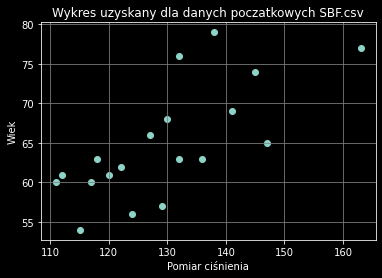

Wyliczony wskaźnik dla modelu: coef_ 
 1.1391862955032126 

Wyliczony wskaźnik dla modelu: intercept_ 
 -77.42612419700221


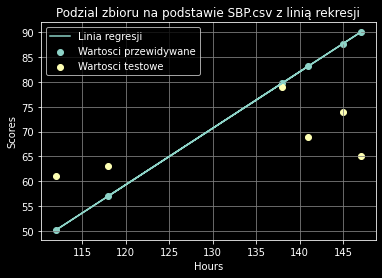

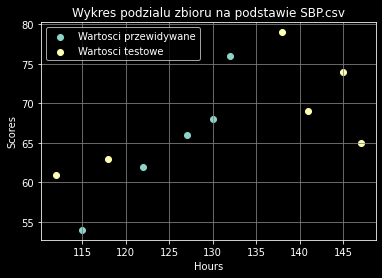

Średni błąd bezwzględny: (Mean Absolute Error) 11.768379728765185
Błąd średniokwadratowy: (Mean Squared Error) 195.2728572585814
Pierwiastek błędu średniokwadratowego : (Root Mean Squared Error) 13.974006485563882


In [221]:
sbf = pd.read_csv(f"SBP.csv",delimiter=',')
#4
cisnienie = sbf['SBP'].to_numpy().reshape(-1, 1)
wiek = sbf['Age'].to_numpy().reshape(-1, 1)

plt.scatter(cisnienie, wiek)
plt.title("Wykres uzyskany dla danych poczatkowych SBF.csv")
plt.xlabel("Pomiar ciśnienia")
plt.ylabel("Wiek")
plt.grid(color = 'grey')
plt.show()
plt.show()

X_train, X_test, y_train, y_test = train_test_split(cisnienie, wiek, train_size=0.3, test_size=0.3)
# print("X_train \n", X_train)
# print("y_train \n", y_train)
# print("X_test \n", X_test)
# print("y_train \n", y_test)

#5
l_regresji = lin.LinearRegression()
l_regresji.fit(X_train, y_train)

#6
coef_ = l_regresji.coef_
intercept_ = l_regresji.intercept_
print("Wyliczony wskaźnik dla modelu: coef_ \n",coef_[0][0],'\n')
print("Wyliczony wskaźnik dla modelu: intercept_ \n",intercept_[0])

#7
y_pred = l_regresji.predict(X_test)

#8
plt.title("Podzial zbioru na podstawie SBP.csv z linią rekresji")
plt.scatter(X_test, y_pred, label = 'Wartosci przewidywane')
plt.scatter(X_test,y_test,label = 'Wartosci testowe')
plt.plot(X_test,y_pred,label = 'Linia regresji')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.legend()
plt.grid(color = 'grey')
plt.show()

#Wyniki przedstawione na wykresie
plt.scatter(X_train,y_train, label = 'Wartosci przewidywane')
plt.scatter(X_test,y_test, label = 'Wartosci testowe')
plt.title("Wykres podzialu zbioru na podstawie SBP.csv")
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.grid(color = 'grey')
plt.show()

#9
squered = metrics.mean_squared_error(y_pred,y_test)
absolute = metrics.mean_absolute_error(y_pred,y_test)
root = np.sqrt(squered)
print("Średni błąd bezwzględny: (Mean Absolute Error)", absolute)
print("Błąd średniokwadratowy: (Mean Squared Error)", squered)
print("Pierwiastek błędu średniokwadratowego : (Root Mean Squared Error)", root)

### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

In [222]:
# Wyświetlanie danych z pliku PETROL.csv
petrol = pd.read_csv(f'{DATA}PETROL.csv', sep=',')
print(petrol)

    Podatek_paliwowy  Sredni_przychod  Utwardzone_autostrady  \
0               9.00             3571                   1976   
1               9.00             4092                   1250   
2               9.00             3865                   1586   
3               7.50             4870                   2351   
4               8.00             4399                    431   
5              10.00             5342                   1333   
6               8.00             5319                  11868   
7               8.00             5126                   2138   
8               8.00             4447                   8577   
9               7.00             4512                   8507   
10              8.00             4391                   5939   
11              7.50             5126                  14186   
12              7.00             4817                   6930   
13              7.00             4207                   6580   
14              7.00             4332   

In [223]:
petrol_h = petrol.head()
petrol_h

,Podatek_paliwowy,Sredni_przychod,Utwardzone_autostrady,Procent_ludnosci_z_prawem_jazdy,Zuzycie_paliwa
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [224]:
petrol_d = petrol.describe()
petrol_d

,Podatek_paliwowy,Sredni_przychod,Utwardzone_autostrady,Procent_ludnosci_z_prawem_jazdy,Zuzycie_paliwa
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [225]:
petrol.shape

(48, 5)

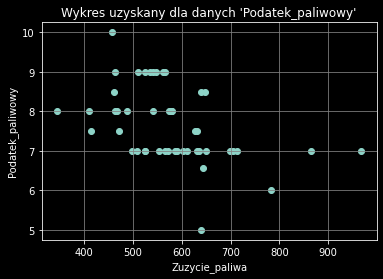

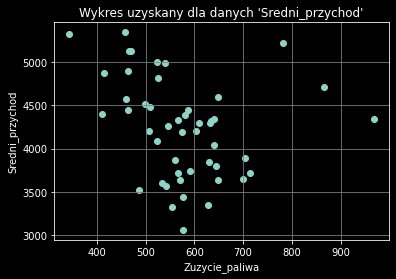

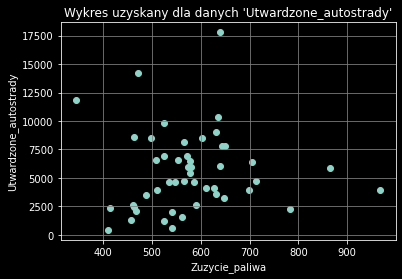

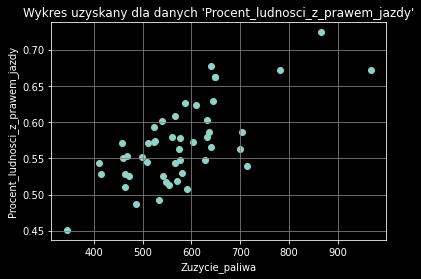

In [226]:
#2
#Dane początkowe dla:

#Podatek_paliwowy
plt.scatter(petrol['Zuzycie_paliwa'],petrol['Podatek_paliwowy'])
plt.title("Wykres uzyskany dla danych 'Podatek_paliwowy'")
plt.xlabel("Zuzycie_paliwa")
plt.ylabel("Podatek_paliwowy")
plt.grid(color = 'grey')
plt.show()

#Sredni_przychod
plt.scatter(petrol['Zuzycie_paliwa'],petrol['Sredni_przychod'])
plt.title("Wykres uzyskany dla danych 'Sredni_przychod'")
plt.xlabel("Zuzycie_paliwa")
plt.ylabel("Sredni_przychod")
plt.grid(color = 'grey')
plt.show()

#Utwardzone_autostrady
plt.scatter(petrol['Zuzycie_paliwa'],petrol['Utwardzone_autostrady'])
plt.title("Wykres uzyskany dla danych 'Utwardzone_autostrady'")
plt.xlabel("Zuzycie_paliwa")
plt.ylabel("Utwardzone_autostrady")
plt.grid(color = 'grey')
plt.show()

#Procent_ludnosci_z_prawem_jazdy
plt.scatter(petrol['Zuzycie_paliwa'],petrol['Procent_ludnosci_z_prawem_jazdy'])
plt.title("Wykres uzyskany dla danych 'Procent_ludnosci_z_prawem_jazdy'")
plt.xlabel("Zuzycie_paliwa")
plt.ylabel("Procent_ludnosci_z_prawem_jazdy")
plt.grid(color = 'grey')
plt.show()

***Przeanalizowanie danych pod względem metody head() oraz describe()***

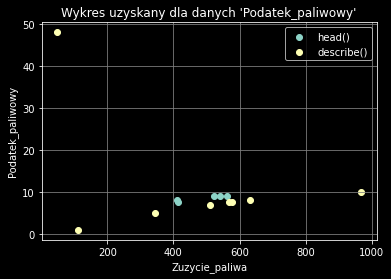

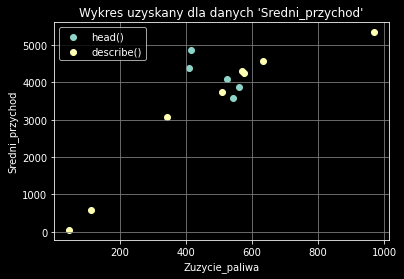

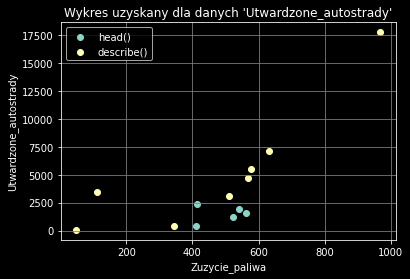

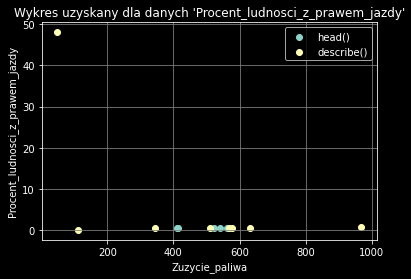

In [227]:
#3
#Tworzenie wykresu typu scatter

#Podatek_paliwowy
#Wykres na podstawie interpretacji danych wedlug metody head()
plt.scatter(petrol_h['Zuzycie_paliwa'],petrol_h['Podatek_paliwowy'], label = 'head()')
#Wykres na podstawie interpretacji danych wedlug metody describe()
plt.scatter(petrol_d['Zuzycie_paliwa'],petrol_d['Podatek_paliwowy'], label = 'describe()')
plt.title("Wykres uzyskany dla danych 'Podatek_paliwowy'")
plt.xlabel("Zuzycie_paliwa")
plt.ylabel("Podatek_paliwowy")
plt.grid(color = 'grey')
plt.legend()
plt.show()

#Sredni_przychod
#Wykres na podstawie interpretacji danych wedlug metody head()
plt.scatter(petrol_h['Zuzycie_paliwa'],petrol_h['Sredni_przychod'], label = 'head()')
#Wykres na podstawie interpretacji danych wedlug metody describe()
plt.scatter(petrol_d['Zuzycie_paliwa'],petrol_d['Sredni_przychod'], label = 'describe()')
plt.title("Wykres uzyskany dla danych 'Sredni_przychod'")
plt.xlabel("Zuzycie_paliwa")
plt.ylabel("Sredni_przychod")
plt.grid(color = 'grey')
plt.legend()
plt.show()

#Utwardzone_autostrady
#Wykres na podstawie interpretacji danych wedlug metody head()
plt.scatter(petrol_h['Zuzycie_paliwa'],petrol_h['Utwardzone_autostrady'], label = 'head()')
#Wykres na podstawie interpretacji danych wedlug metody describe()
plt.scatter(petrol_d['Zuzycie_paliwa'],petrol_d['Utwardzone_autostrady'], label = 'describe()')
plt.title("Wykres uzyskany dla danych 'Utwardzone_autostrady'")
plt.xlabel("Zuzycie_paliwa")
plt.ylabel("Utwardzone_autostrady")
plt.grid(color = 'grey')
plt.legend()
plt.show()

#Procent_ludnosci_z_prawem_jazdy
#Wykres na podstawie interpretacji danych wedlug metody head()
plt.scatter(petrol_h['Zuzycie_paliwa'],petrol_h['Procent_ludnosci_z_prawem_jazdy'], label = 'head()')
#Wykres na podstawie interpretacji danych wedlug metody describe()
plt.scatter(petrol_d['Zuzycie_paliwa'],petrol_d['Procent_ludnosci_z_prawem_jazdy'], label = 'describe()')
plt.title("Wykres uzyskany dla danych 'Procent_ludnosci_z_prawem_jazdy'")
plt.xlabel("Zuzycie_paliwa")
plt.ylabel("Procent_ludnosci_z_prawem_jazdy")
plt.grid(color = 'grey')
plt.legend()
plt.show()

***Przeanalizowanie danych 'Zuzycie_paliwa' oraz 'Podatek_paliwowy'***

Wyliczony wskaźnik dla modelu: coef_ 
 -0.005008828478122182 

Wyliczony wskaźnik dla modelu: intercept_ 
 10.556143389252622


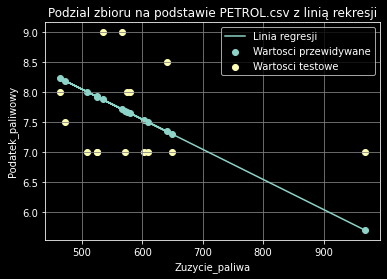

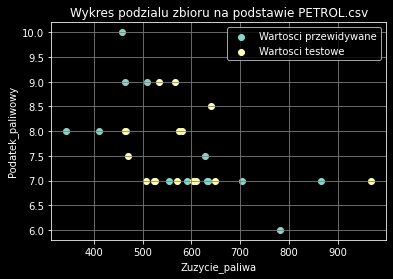

Średni błąd bezwzględny: (Mean Absolute Error) 0.7562696997009323
Błąd średniokwadratowy: (Mean Squared Error) 0.7004508248690979
Pierwiastek błędu średniokwadratowego : (Root Mean Squared Error) 0.8369294025597965


In [228]:
#4
#funkcja reshape jest potrzebna do zastosowania linii regresji
zp = petrol['Zuzycie_paliwa'].to_numpy().reshape(-1, 1)
pp = petrol['Podatek_paliwowy'].to_numpy().reshape(-1, 1)
#Podział podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) oraz podzial zbióru na dane testowe i treningowe (30%)
X_train, X_test, y_train, y_test = train_test_split(zp, pp, train_size=0.3, test_size=0.3)
# print("X_train \n", X_train)
# print("y_train \n", y_train)
# print("X_test \n", X_test)
# print("y_train \n", y_test)

#5
l_regresji = lin.LinearRegression()
l_regresji.fit(X_train, y_train)

#6
coef_ = l_regresji.coef_
intercept_ = l_regresji.intercept_
print("Wyliczony wskaźnik dla modelu: coef_ \n",coef_[0][0],'\n')
print("Wyliczony wskaźnik dla modelu: intercept_ \n",intercept_[0])

#7
y_pred = l_regresji.predict(X_test)

#8
plt.title("Podzial zbioru na podstawie PETROL.csv z linią rekresji")
plt.scatter(X_test, y_pred, label = 'Wartosci przewidywane')
plt.scatter(X_test,y_test,label = 'Wartosci testowe')
plt.plot(X_test,y_pred,label = 'Linia regresji')
plt.xlabel("Zuzycie_paliwa")
plt.ylabel("Podatek_paliwowy")
plt.legend()
plt.grid(color = 'grey')
plt.show()

#Wyniki przedstawione na wykresie
plt.scatter(X_train,y_train, label = 'Wartosci przewidywane')
plt.scatter(X_test,y_test, label = 'Wartosci testowe')
plt.title("Wykres podzialu zbioru na podstawie PETROL.csv")
plt.xlabel('Zuzycie_paliwa')
plt.ylabel('Podatek_paliwowy')
plt.legend()
plt.grid(color = 'grey')
plt.show()

#9
squered = metrics.mean_squared_error(y_pred,y_test)
absolute = metrics.mean_absolute_error(y_pred,y_test)
root = np.sqrt(squered)
print("Średni błąd bezwzględny: (Mean Absolute Error)", absolute)
print("Błąd średniokwadratowy: (Mean Squared Error)", squered)
print("Pierwiastek błędu średniokwadratowego : (Root Mean Squared Error)", root)

***Przeanalizowanie danych 'Zuzycie_paliwa' oraz 'Sredni_przychod'***

Wyliczony wskaźnik dla modelu: coef_ 
 -0.6292348320720206 

Wyliczony wskaźnik dla modelu: intercept_ 
 4638.757469143367


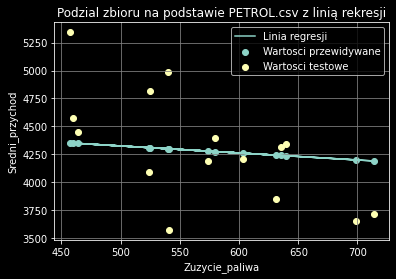

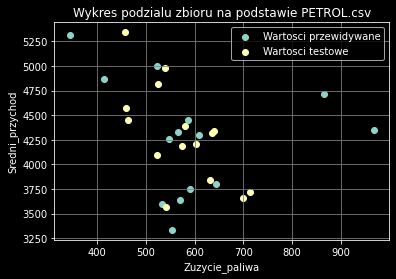

Średni błąd bezwzględny: (Mean Absolute Error) 353.77873688918083
Błąd średniokwadratowy: (Mean Squared Error) 204025.7987996818
Pierwiastek błędu średniokwadratowego : (Root Mean Squared Error) 451.69215047383966


In [229]:
#4
#funkcja reshape jest potrzebna do zastosowania linii regresji
zp = petrol['Zuzycie_paliwa'].to_numpy().reshape(-1, 1)
sp = petrol['Sredni_przychod'].to_numpy().reshape(-1, 1)
#Podział podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) oraz podzial zbióru na dane testowe i treningowe (30%)
X_train, X_test, y_train, y_test = train_test_split(zp, sp, train_size=0.3, test_size=0.3)
# print("X_train \n", X_train)
# print("y_train \n", y_train)
# print("X_test \n", X_test)
# print("y_train \n", y_test)

#5
l_regresji = lin.LinearRegression()
l_regresji.fit(X_train, y_train)

#6
coef_ = l_regresji.coef_
intercept_ = l_regresji.intercept_
print("Wyliczony wskaźnik dla modelu: coef_ \n",coef_[0][0],'\n')
print("Wyliczony wskaźnik dla modelu: intercept_ \n",intercept_[0])

#7
y_pred = l_regresji.predict(X_test)

#8
plt.title("Podzial zbioru na podstawie PETROL.csv z linią rekresji")
plt.scatter(X_test, y_pred, label = 'Wartosci przewidywane')
plt.scatter(X_test,y_test,label = 'Wartosci testowe')
plt.plot(X_test,y_pred,label = 'Linia regresji')
plt.xlabel("Zuzycie_paliwa")
plt.ylabel("Sredni_przychod")
plt.legend()
plt.grid(color = 'grey')
plt.show()

#Wyniki przedstawione na wykresie
plt.scatter(X_train,y_train, label = 'Wartosci przewidywane')
plt.scatter(X_test,y_test, label = 'Wartosci testowe')
plt.title("Wykres podzialu zbioru na podstawie PETROL.csv")
plt.xlabel('Zuzycie_paliwa')
plt.ylabel('Sredni_przychod')
plt.legend()
plt.grid(color = 'grey')
plt.show()

#9
squered = metrics.mean_squared_error(y_pred,y_test)
absolute = metrics.mean_absolute_error(y_pred,y_test)
root = np.sqrt(squered)
print("Średni błąd bezwzględny: (Mean Absolute Error)", absolute)
print("Błąd średniokwadratowy: (Mean Squared Error)", squered)
print("Pierwiastek błędu średniokwadratowego : (Root Mean Squared Error)", root)

***Przeanalizowanie danych 'Zuzycie_paliwa' oraz 'Utwardzone_autostrady'***

Wyliczony wskaźnik dla modelu: coef_ 
 -7.314688433137614 

Wyliczony wskaźnik dla modelu: intercept_ 
 10475.603193270697


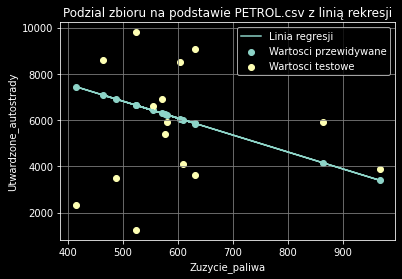

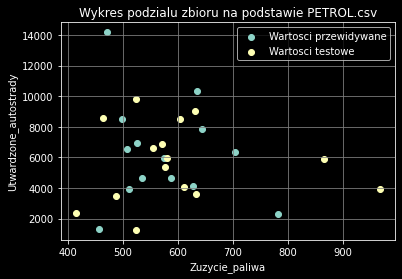

Średni błąd bezwzględny: (Mean Absolute Error) 2170.007621470927
Błąd średniokwadratowy: (Mean Squared Error) 7224227.278867667
Pierwiastek błędu średniokwadratowego : (Root Mean Squared Error) 2687.792268548235


In [230]:
#4
#funkcja reshape jest potrzebna do zastosowania linii regresji
zp = petrol['Zuzycie_paliwa'].to_numpy().reshape(-1, 1)
ua = petrol['Utwardzone_autostrady'].to_numpy().reshape(-1, 1)
#Podział podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) oraz podzial zbióru na dane testowe i treningowe (30%)
X_train, X_test, y_train, y_test = train_test_split(zp, ua, train_size=0.3, test_size=0.3)
# print("X_train \n", X_train)
# print("y_train \n", y_train)
# print("X_test \n", X_test)
# print("y_train \n", y_test)

#5
l_regresji = lin.LinearRegression()
l_regresji.fit(X_train, y_train)

#6
coef_ = l_regresji.coef_
intercept_ = l_regresji.intercept_
print("Wyliczony wskaźnik dla modelu: coef_ \n",coef_[0][0],'\n')
print("Wyliczony wskaźnik dla modelu: intercept_ \n",intercept_[0])

#7
y_pred = l_regresji.predict(X_test)

#8
plt.title("Podzial zbioru na podstawie PETROL.csv z linią rekresji")
plt.scatter(X_test, y_pred, label = 'Wartosci przewidywane')
plt.scatter(X_test,y_test,label = 'Wartosci testowe')
plt.plot(X_test,y_pred,label = 'Linia regresji')
plt.xlabel("Zuzycie_paliwa")
plt.ylabel("Utwardzone_autostrady")
plt.legend()
plt.grid(color = 'grey')
plt.show()

#Wyniki przedstawione na wykresie
plt.scatter(X_train,y_train, label = 'Wartosci przewidywane')
plt.scatter(X_test,y_test, label = 'Wartosci testowe')
plt.title("Wykres podzialu zbioru na podstawie PETROL.csv")
plt.xlabel('Zuzycie_paliwa')
plt.ylabel('Utwardzone_autostrady')
plt.legend()
plt.grid(color = 'grey')
plt.show()

#9
squered = metrics.mean_squared_error(y_pred,y_test)
absolute = metrics.mean_absolute_error(y_pred,y_test)
root = np.sqrt(squered)
print("Średni błąd bezwzględny: (Mean Absolute Error)", absolute)
print("Błąd średniokwadratowy: (Mean Squared Error)", squered)
print("Pierwiastek błędu średniokwadratowego : (Root Mean Squared Error)", root)

***Przeanalizowanie danych 'Zuzycie_paliwa' oraz 'Procent_ludnosci_z_prawem_jazdy'***

Wyliczony wskaźnik dla modelu: coef_ 
 0.00036447118106813873 

Wyliczony wskaźnik dla modelu: intercept_ 
 0.3744057740580802


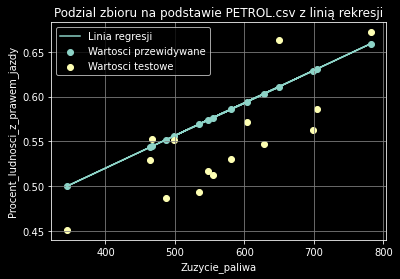

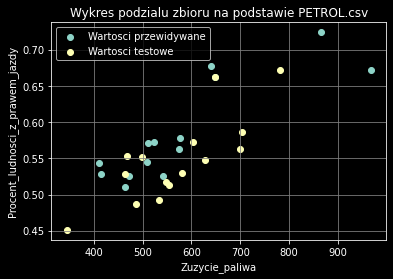

Średni błąd bezwzględny: (Mean Absolute Error) 0.04311354996733146
Błąd średniokwadratowy: (Mean Squared Error) 0.0023965245212881963
Pierwiastek błędu średniokwadratowego : (Root Mean Squared Error) 0.04895431054859415


In [231]:
#4
#funkcja reshape jest potrzebna do zastosowania linii regresji
zp = petrol['Zuzycie_paliwa'].to_numpy().reshape(-1, 1)
pj = petrol['Procent_ludnosci_z_prawem_jazdy'].to_numpy().reshape(-1, 1)
#Podział podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) oraz podzial zbióru na dane testowe i treningowe (30%)
X_train, X_test, y_train, y_test = train_test_split(zp, pj, train_size=0.3, test_size=0.3)
# print("X_train \n", X_train)
# print("y_train \n", y_train)
# print("X_test \n", X_test)
# print("y_train \n", y_test)

#5
l_regresji = lin.LinearRegression()
l_regresji.fit(X_train, y_train)

#6
coef_ = l_regresji.coef_
intercept_ = l_regresji.intercept_
print("Wyliczony wskaźnik dla modelu: coef_ \n",coef_[0][0],'\n')
print("Wyliczony wskaźnik dla modelu: intercept_ \n",intercept_[0])

#7
y_pred = l_regresji.predict(X_test)

#8
plt.title("Podzial zbioru na podstawie PETROL.csv z linią rekresji")
plt.scatter(X_test, y_pred, label = 'Wartosci przewidywane')
plt.scatter(X_test,y_test,label = 'Wartosci testowe')
plt.plot(X_test,y_pred,label = 'Linia regresji')
plt.xlabel("Zuzycie_paliwa")
plt.ylabel("Procent_ludnosci_z_prawem_jazdy")
plt.legend()
plt.grid(color = 'grey')
plt.show()

#Wyniki przedstawione na wykresie
plt.scatter(X_train,y_train, label = 'Wartosci przewidywane')
plt.scatter(X_test,y_test, label = 'Wartosci testowe')
plt.title("Wykres podzialu zbioru na podstawie PETROL.csv")
plt.xlabel('Zuzycie_paliwa')
plt.ylabel('Procent_ludnosci_z_prawem_jazdy')
plt.legend()
plt.grid(color = 'grey')
plt.show()

#9
squered = metrics.mean_squared_error(y_pred,y_test)
absolute = metrics.mean_absolute_error(y_pred,y_test)
root = np.sqrt(squered)
print("Średni błąd bezwzględny: (Mean Absolute Error)", absolute)
print("Błąd średniokwadratowy: (Mean Squared Error)", squered)
print("Pierwiastek błędu średniokwadratowego : (Root Mean Squared Error)", root)

### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

In [232]:
#2
# Wyświetlanie danych z pliku HEART.csv
heart = pd.read_csv(f'{DATA}HEART.csv', sep=',')
print(heart)

     age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak slope ca  \
0     28    1   2      130  132   0       2     185     0      0.0     ?  ?   
1     29    1   2      120  243   0       0     160     0      0.0     ?  ?   
2     29    1   2      140    ?   0       0     170     0      0.0     ?  ?   
3     30    0   1      170  237   0       1     170     0      0.0     ?  ?   
4     31    0   2      100  219   0       1     150     0      0.0     ?  ?   
..   ...  ...  ..      ...  ...  ..     ...     ...   ...      ...   ... ..   
289   52    1   4      160  331   0       0      94     1      2.5     ?  ?   
290   54    0   3      130  294   0       1     100     1      0.0     2  ?   
291   56    1   4      155  342   1       0     150     1      3.0     2  ?   
292   58    0   2      180  393   0       0     110     1      1.0     2  ?   
293   65    1   4      130  275   0       1     115     1      1.0     2  ?   

    thal  num         
0      ?           0  
1    

In [233]:
#interpretacja
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [234]:
heart.describe()

,age,sex,cp,oldpeak,num
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,0.586054,0.360544
std,7.811812,0.447533,0.965117,0.908648,0.480977
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,5.000000,1.000000


In [235]:
heart.shape

(294, 14)

In [236]:
#3
heart = heart.replace("?", np.nan)
heart


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,NaN,NaN,NaN,0
1,29,1,2,120,243,0,0,160,0,0.0,NaN,NaN,NaN,0
2,29,1,2,140,NaN,0,0,170,0,0.0,NaN,NaN,NaN,0
3,30,0,1,170,237,0,1,170,0,0.0,NaN,NaN,6,0
4,31,0,2,100,219,0,1,150,0,0.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,NaN,NaN,NaN,1
290,54,0,3,130,294,0,1,100,1,0.0,2,NaN,NaN,1
291,56,1,4,155,342,1,0,150,1,3.0,2,NaN,NaN,1
292,58,0,2,180,393,0,0,110,1,1.0,2,NaN,7,1


In [237]:
heart = heart.drop(columns=['slope', 'ca', 'thal'])
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,NaN,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0


In [238]:
heart = heart.dropna()
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0
5,32,0,2,105,198,0,0,165,0,0.0,0


In [239]:
#4
heart = pd.get_dummies(heart,columns = ["cp","restecg"])
heart.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,cp_1,cp_2,cp_3,cp_4,restecg_0,restecg_1,restecg_2
0,28,1,130,132,0,185,0,0.0,0,0,1,0,0,0,0,1
1,29,1,120,243,0,160,0,0.0,0,0,1,0,0,1,0,0
3,30,0,170,237,0,170,0,0.0,0,1,0,0,0,0,1,0
4,31,0,100,219,0,150,0,0.0,0,0,1,0,0,0,1,0
5,32,0,105,198,0,165,0,0.0,0,0,1,0,0,1,0,0


In [240]:
#5
columns = np.array(heart[["age","sex","trestbps","chol","fbs","thalach","exang","oldpeak","cp_1","cp_2","cp_3","cp_4","restecg_0","restecg_1","restecg_2"]])

X_train, X_test, y_train, y_test = train_test_split(columns, np.array(heart["num       "]).reshape(-1, 1), test_size=0.20)
#6
l_regresji = lin.LogisticRegression().fit(X_train, y_train.ravel())
l_regresji

C:\Users\marci\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [241]:
#7
y_pred = l_regresji.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89        35
           1       0.81      0.72      0.76        18

    accuracy                           0.85        53
   macro avg       0.84      0.82      0.83        53
weighted avg       0.85      0.85      0.85        53

